In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc, confusion_matrix
from sklearn.metrics import  ConfusionMatrixDisplay,  make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, mean_absolute_error

In [2]:
df = pd.read_csv(r"diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [4]:
df.duplicated().value_counts()

False    229474
True      24206
Name: count, dtype: int64

In [5]:
df.drop_duplicates(inplace = True)

In [6]:
df.duplicated().value_counts()

False    229474
Name: count, dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,229474.0,0.152945,0.359936,0.0,0.0,0.0,0.0,1.0
HighBP,229474.0,0.454343,0.497912,0.0,0.0,0.0,1.0,1.0
HighChol,229474.0,0.441640,0.496584,0.0,0.0,0.0,1.0,1.0
CholCheck,229474.0,0.959481,0.197173,0.0,1.0,1.0,1.0,1.0
BMI,229474.0,28.687507,6.789204,12.0,24.0,27.0,32.0,98.0
Smoker,229474.0,0.465800,0.498830,0.0,0.0,0.0,1.0,1.0
Stroke,229474.0,0.044816,0.206899,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229474.0,0.103336,0.304398,0.0,0.0,0.0,0.0,1.0
PhysActivity,229474.0,0.733042,0.442371,0.0,0.0,1.0,1.0,1.0
Fruits,229474.0,0.612675,0.487140,0.0,0.0,1.0,1.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  MentH

In [9]:
P = df['Diabetes_binary']
X = df.drop(['Diabetes_binary'], axis = 1)

x_resampled, y_resampled = SMOTE(random_state = 42).fit_resample(X,P)
df_resampled = pd.concat([x_resampled, y_resampled], axis = 1)
df_resampled.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,0.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,0.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,0.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,0.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,0.0


In [10]:
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388754 entries, 0 to 388753
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                388754 non-null  float64
 1   HighChol              388754 non-null  float64
 2   CholCheck             388754 non-null  float64
 3   BMI                   388754 non-null  float64
 4   Smoker                388754 non-null  float64
 5   Stroke                388754 non-null  float64
 6   HeartDiseaseorAttack  388754 non-null  float64
 7   PhysActivity          388754 non-null  float64
 8   Fruits                388754 non-null  float64
 9   Veggies               388754 non-null  float64
 10  HvyAlcoholConsump     388754 non-null  float64
 11  AnyHealthcare         388754 non-null  float64
 12  NoDocbcCost           388754 non-null  float64
 13  GenHlth               388754 non-null  float64
 14  MentHlth              388754 non-null  float64
 15  

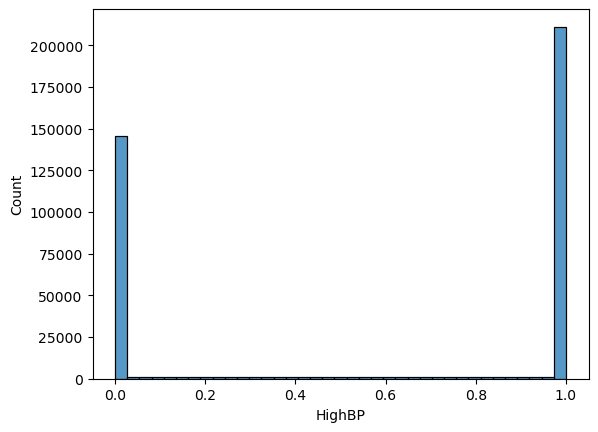

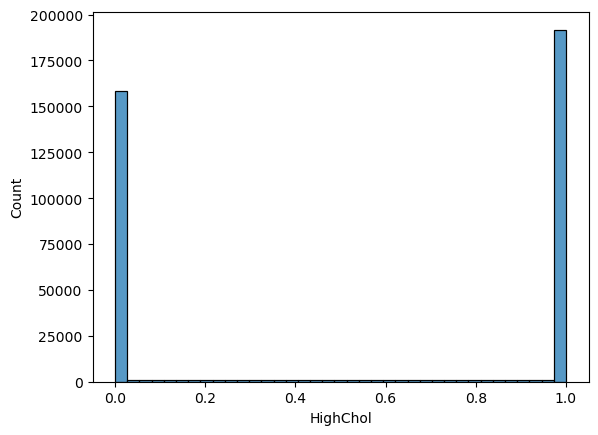

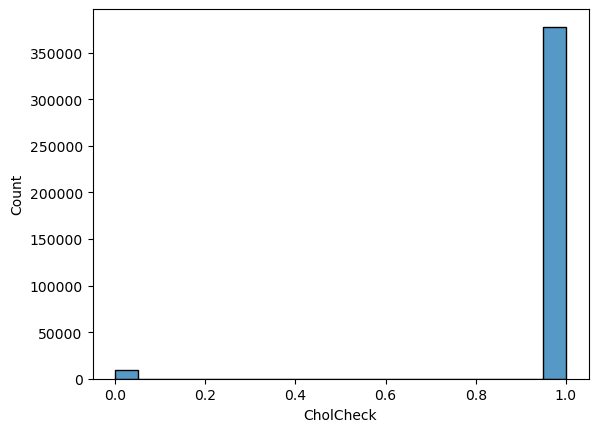

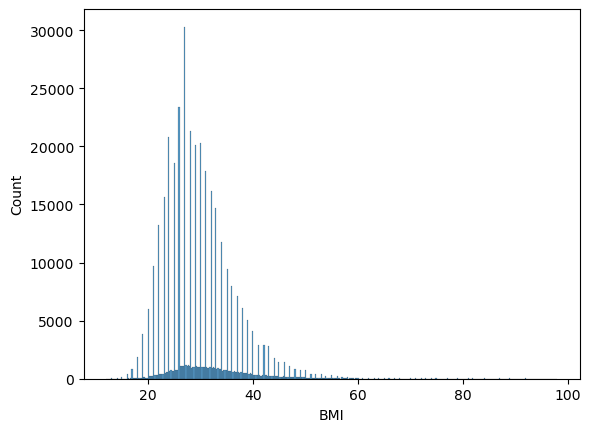

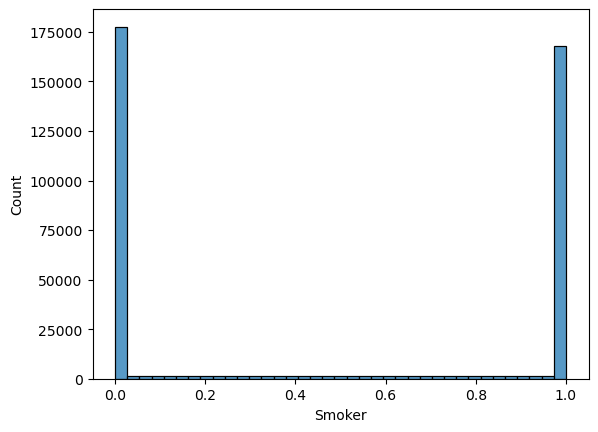

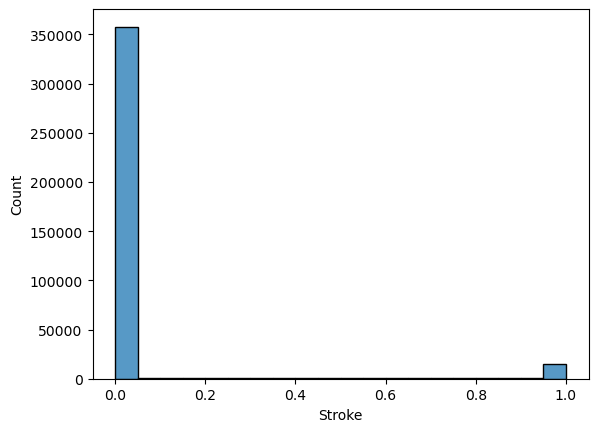

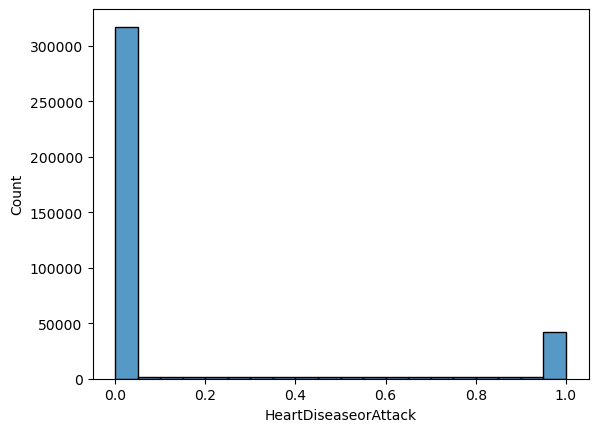

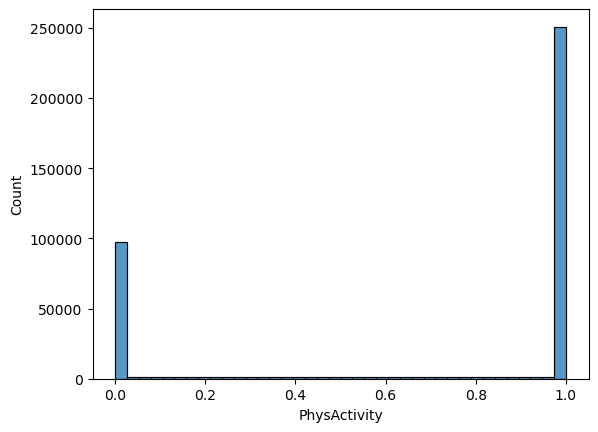

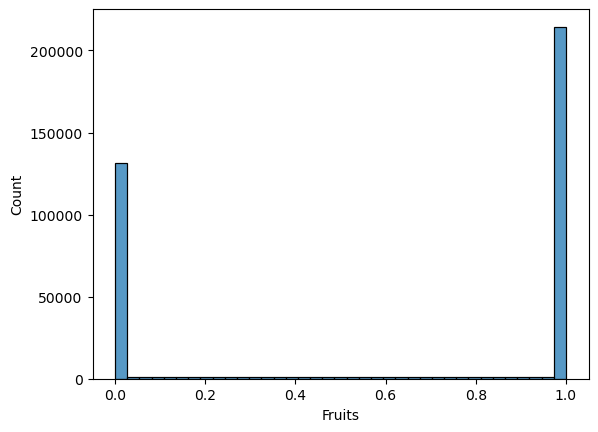

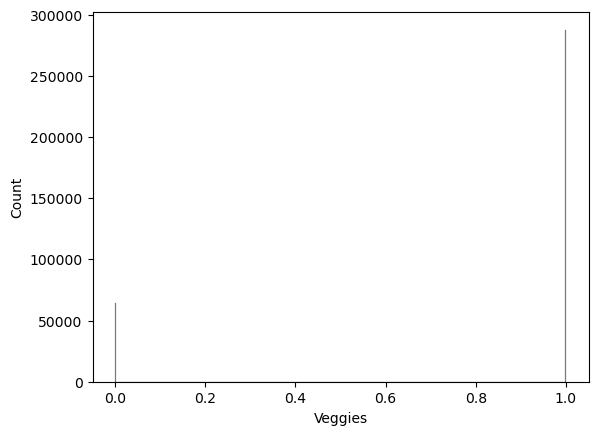

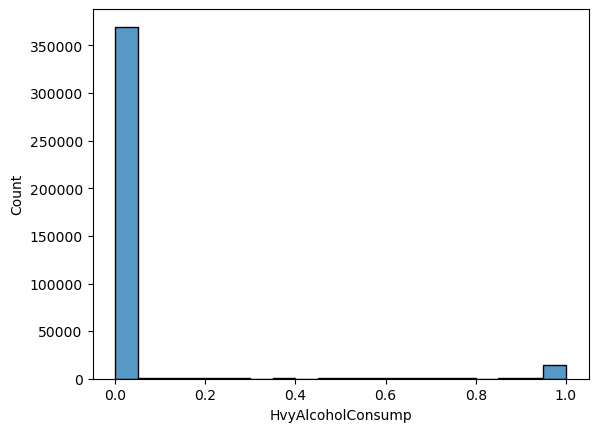

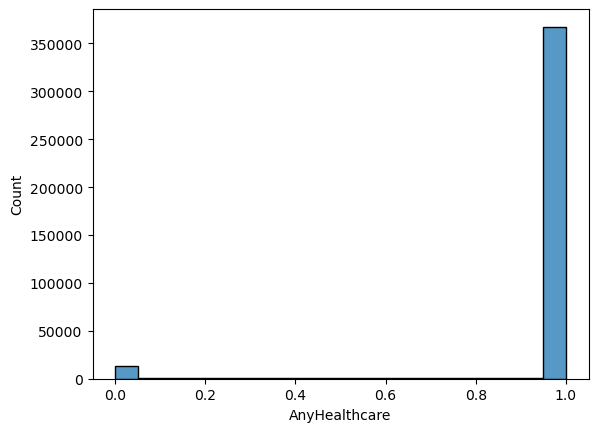

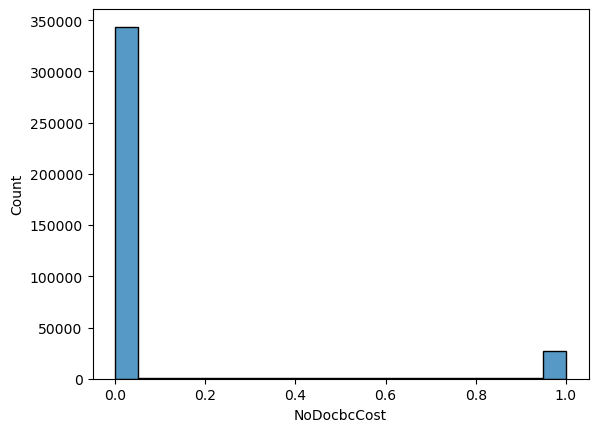

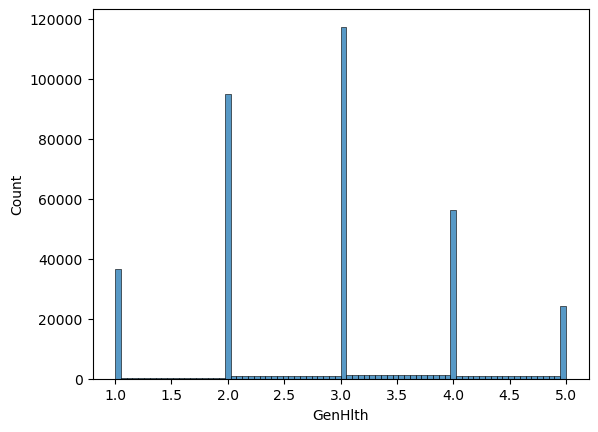

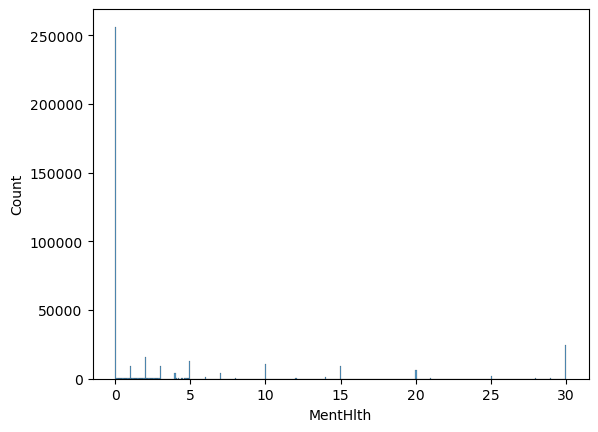

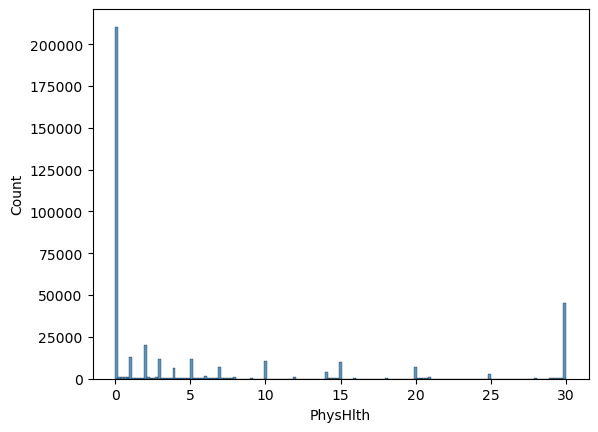

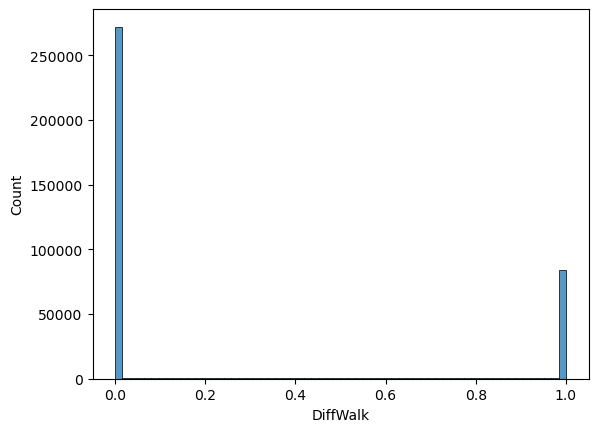

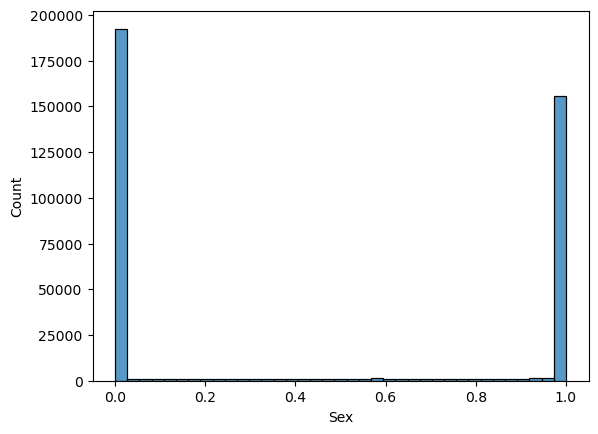

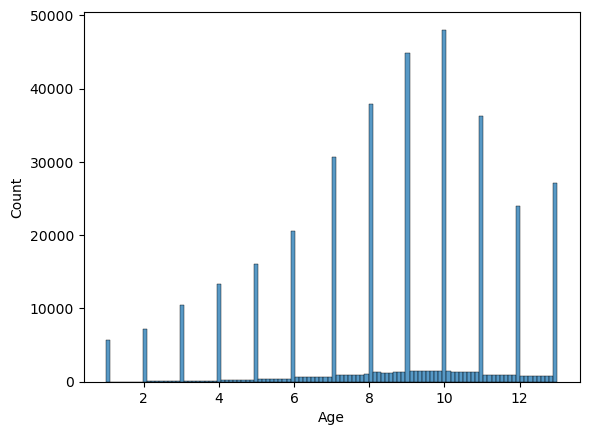

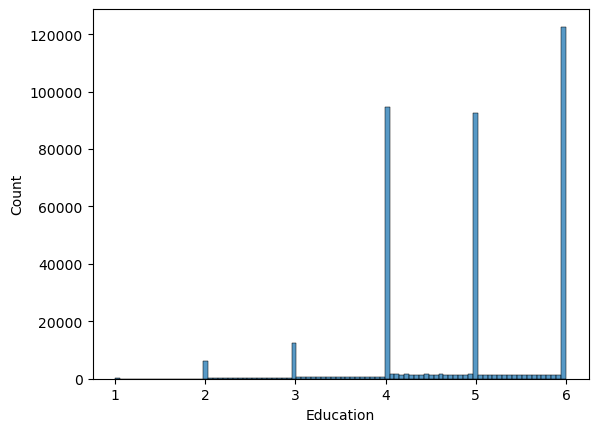

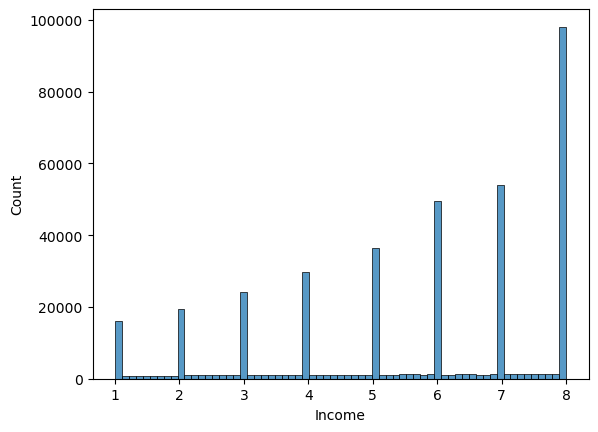

In [11]:
cols = df_resampled.columns

for col in cols:
    if len(df_resampled[col].unique()) > 5:
        plt.figure()
        sns.histplot(data = df_resampled, x = col)
        plt.show()

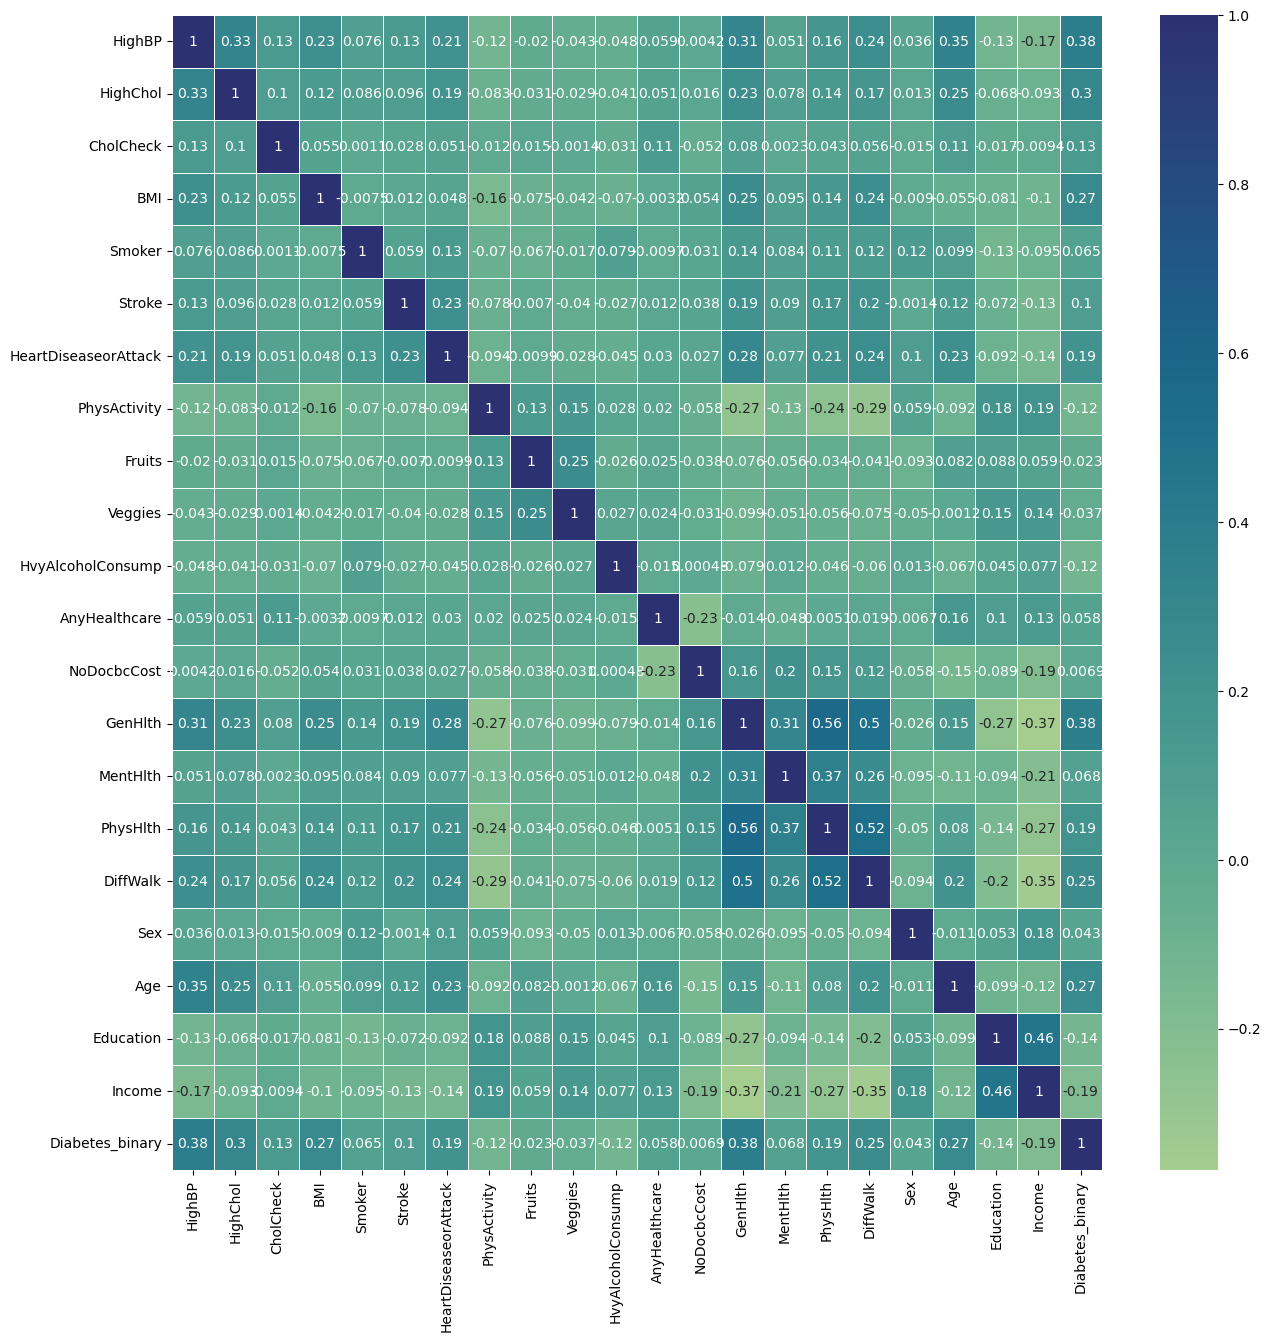

In [12]:
plt.figure(figsize = (15,15))
sns.heatmap(df_resampled.corr(), annot = True, cmap = 'crest', linewidth = 0.5)
plt.show()

In [13]:
threshold = 0.1

target_column = 'Diabetes_binary'

# Calculate the correlation matrix
correlation_matrix = df_resampled.corr()

# Extract correlations with the target column
correlation_with_target = correlation_matrix[target_column]

# Filter columns based on the threshold (positive and negative correlations)
filtered_columns = correlation_with_target[correlation_with_target.abs() >= threshold].index

# Create a new DataFrame with only the filtered columns
df_filtered = df_resampled[filtered_columns]

# Output the filtered DataFrame
print(df_filtered.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388754 entries, 0 to 388753
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                388754 non-null  float64
 1   HighChol              388754 non-null  float64
 2   CholCheck             388754 non-null  float64
 3   BMI                   388754 non-null  float64
 4   Stroke                388754 non-null  float64
 5   HeartDiseaseorAttack  388754 non-null  float64
 6   PhysActivity          388754 non-null  float64
 7   HvyAlcoholConsump     388754 non-null  float64
 8   GenHlth               388754 non-null  float64
 9   PhysHlth              388754 non-null  float64
 10  DiffWalk              388754 non-null  float64
 11  Age                   388754 non-null  float64
 12  Education             388754 non-null  float64
 13  Income                388754 non-null  float64
 14  Diabetes_binary       388754 non-null  float64
dtype

In [14]:
x_resampled = df_filtered.drop(['Diabetes_binary'], axis = 1)
y_resampled = df_filtered['Diabetes_binary']

In [15]:
def print_metrics(model):
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted'),
        'mae': make_scorer(mean_absolute_error)
        }

    # Evaluate final model using cross-validation
    scores = cross_validate(model, x_resampled, y_resampled, scoring=scoring, n_jobs = -1)
    cross_val_scores = cross_val_score(model, x_resampled, y_resampled, cv=5, scoring = 'accuracy', n_jobs = -1)
    test_res = cross_val_predict(model,x_resampled, y_resampled, n_jobs = -1)

    # Print Cross-validation scores
    print(f"Cross-validation Score: {100*cross_val_scores.mean():.2f}")
    print(f"Cross-validation Accuracy: {100*np.mean(scores['test_accuracy']):.2f}")
    print(f"Cross-validation Precision: {100*np.mean(scores['test_precision']):.2f}")
    print(f"Cross-validation Recall: {100*np.mean(scores['test_recall']):.2f}")
    print(f"Cross-validation F1 Score: {100*np.mean(scores['test_f1']):.2f}")
    print(f"Cross-validation MAE: {100*np.mean(scores['test_mae']):.2f}")

    cf = confusion_matrix(y_resampled,test_res)
    cf_plot = ConfusionMatrixDisplay(cf)

    cf_plot.plot()
    plt.show()

Cross-validation Score: 74.11
Cross-validation Accuracy: 74.11
Cross-validation Precision: 74.22
Cross-validation Recall: 74.11
Cross-validation F1 Score: 74.08
Cross-validation MAE: 25.89


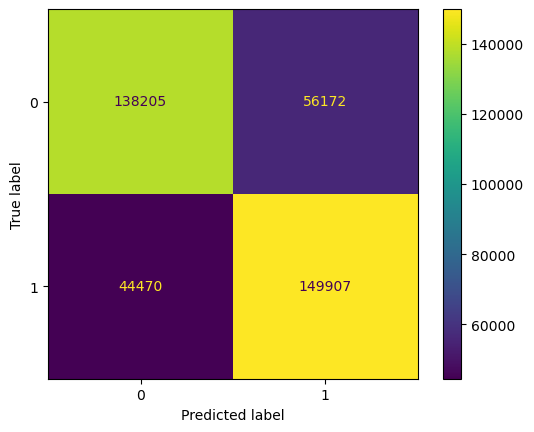

In [16]:
lr = LogisticRegression(max_iter = 1000, random_state = 42)
print_metrics(lr)

Cross-validation Score: 85.26
Cross-validation Accuracy: 85.26
Cross-validation Precision: 88.56
Cross-validation Recall: 85.26
Cross-validation F1 Score: 83.85
Cross-validation MAE: 14.74


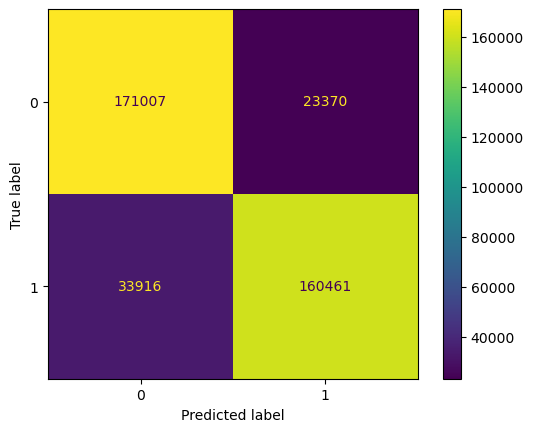

In [17]:
dtc = DecisionTreeClassifier(random_state = 42)
print_metrics(dtc)

Cross-validation Score: 87.83
Cross-validation Accuracy: 87.83
Cross-validation Precision: 91.39
Cross-validation Recall: 87.83
Cross-validation F1 Score: 86.16
Cross-validation MAE: 12.17


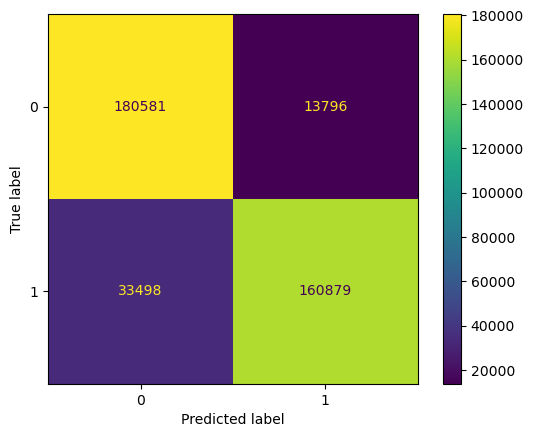

In [18]:
rf = RandomForestClassifier(random_state = 42)
print_metrics(rf)

Cross-validation Score: 80.75
Cross-validation Accuracy: 80.75
Cross-validation Precision: 82.53
Cross-validation Recall: 80.75
Cross-validation F1 Score: 80.49
Cross-validation MAE: 19.25


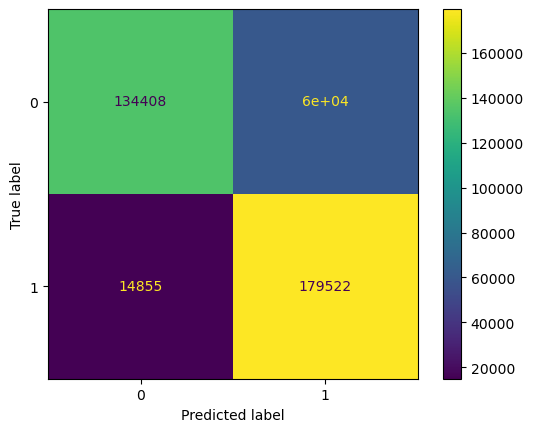

In [19]:
knn = KNeighborsClassifier()
print_metrics(knn)

Cross-validation Score: 80.40
Cross-validation Accuracy: 80.40
Cross-validation Precision: 82.98
Cross-validation Recall: 80.40
Cross-validation F1 Score: 78.94
Cross-validation MAE: 19.60


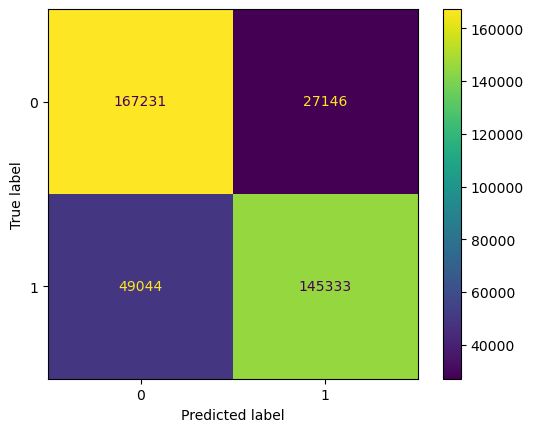

In [20]:
mlp = MLPClassifier(max_iter = 1000, random_state = 42)
print_metrics(mlp)

Cross-validation Score: 82.32
Cross-validation Accuracy: 82.32
Cross-validation Precision: 83.88
Cross-validation Recall: 82.32
Cross-validation F1 Score: 81.67
Cross-validation MAE: 17.68


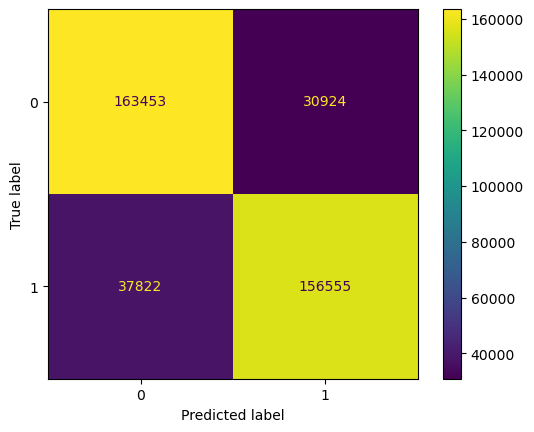

In [21]:
abc = AdaBoostClassifier(random_state = 42)
print_metrics(abc)

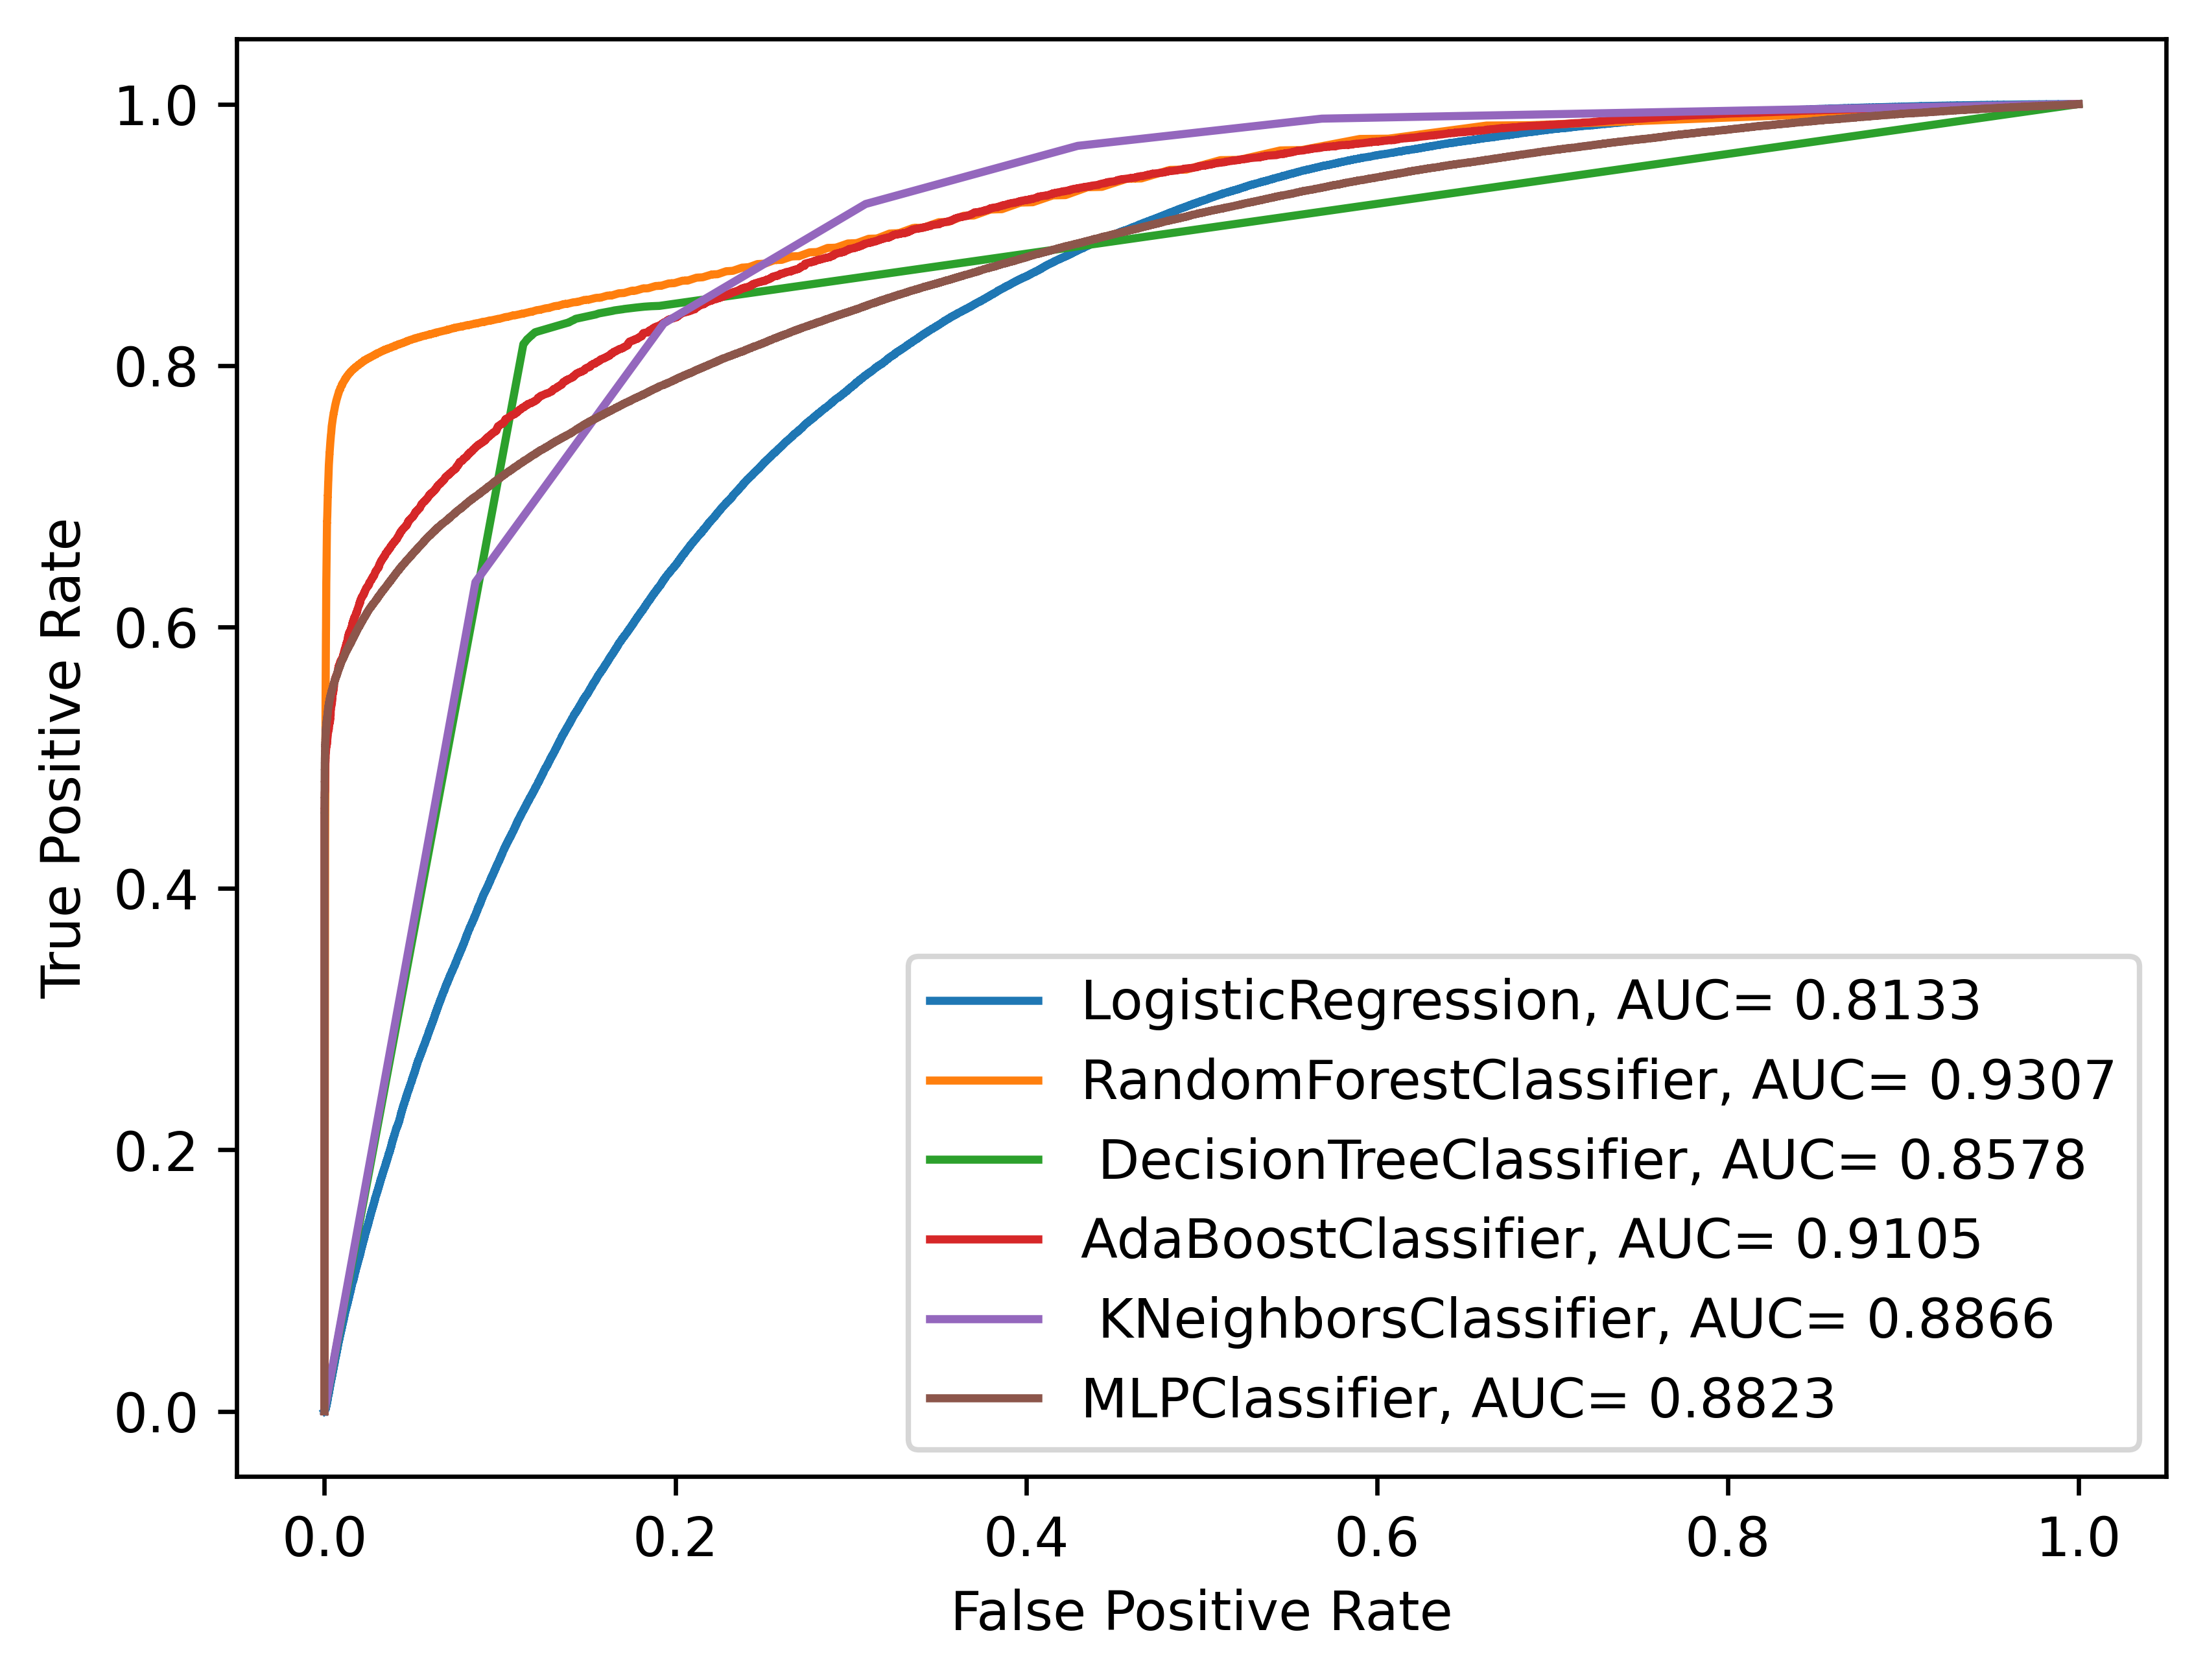

In [22]:
#### set up plotting area
plt.figure(0, dpi = 600 ).clf()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


#logistic regression model
def plot_roc(model, X, P, label) :
    test_res = cross_val_predict(model, X, P, method='predict_proba', n_jobs = -1)[:,1]
    fpr, tpr, _ = metrics.roc_curve(P, test_res)
    auc = round(metrics.roc_auc_score(P, test_res), 4)
    plt.plot(fpr,tpr,label=f"{label}, AUC= {auc}")

plot_roc(lr, x_resampled, y_resampled, "LogisticRegression")
plot_roc(rf, x_resampled, y_resampled, "RandomForestClassifier")
plot_roc(dtc, x_resampled, y_resampled, " DecisionTreeClassifier")
plot_roc(abc, x_resampled, y_resampled, "AdaBoostClassifier")
plot_roc(knn,x_resampled, y_resampled, " KNeighborsClassifier")
plot_roc(mlp, x_resampled, y_resampled, "MLPClassifier")

plt.legend()
plt.savefig('diabetes.png') 
plt.show()